In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style
from sklearn import linear_model
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv("student-mat.csv",sep=";")

In [3]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data = data[["G1", "G2", "G3", "studytime", "failures","absences"]]

In [5]:
data.head(5)

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [6]:
predict = "G3"
x = np.array(data.drop([predict],1))
y = np.array(data[predict])

/tmp/ipykernel_3213/2008606917.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(data.drop([predict],1))


In [7]:
print (x[:5])

[[ 5  6  2  0  6]
 [ 5  5  2  0  4]
 [ 7  8  2  3 10]
 [15 14  3  0  2]
 [ 6 10  2  0  4]]


In [8]:
best = 0
for _ in range(30):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print(acc,'\n')
    if acc > best:
        best = acc
        with open("studentmodel.pickle","wb") as f:
            pickle.dump(linear,f)

0.8540634521213906 

0.6927308585584607 

0.840457300033672 

0.850072692392269 

0.7662556432333253 

0.8701082111508559 

0.8021442484634526 

0.8476908544737405 

0.7518951415675779 

0.8471548698087075 

0.8432724276832478 

0.8454195549117107 

0.8466043470167098 

0.927973725738577 

0.8511289840687434 

0.844401221282532 

0.9300628171862115 

0.9180400248363066 

0.8749617650578662 

0.934659668511619 

0.9384349363498282 

0.8051227602165273 

0.9277702890617588 

0.9298253123249235 

0.8265732730877877 

0.8819645111078218 

0.7347042621511333 

0.7061628755610115 

0.8972604139156097 

0.8490457691284155 



In [9]:
linear = pickle.load(open("studentmodel.pickle", "rb"))

In [10]:
print('Coefficient: \n', linear.coef_,'\n')
print('Intercept: ', linear.intercept_, '\n')

Coefficient: 
 [ 0.15938705  0.97343287 -0.18809618 -0.24927061  0.03732057] 

Intercept:  -1.5299965604061203 



In [11]:
predictions = linear.predict(x_test)

In [12]:
for x in range(len(predictions)):
    print(predictions[x],x_test[x],y_test[x])

11.911573575548749 [12 12  2  0  6] 12
16.29058431495517 [16 16  4  0 12] 16
12.63237391567938 [13 13  3  0  0] 13
8.448577448163642 [10  9  2  0  0] 0
-0.7617704435685619 [6 0 1 0 0] 0
5.733690291910383 [8 7 2 3 8] 8
13.793902971693269 [13 14  2  0  0] 15
13.953290021349845 [14 14  2  0  0] 14
9.337264407864382 [ 9 10  2  0  2] 9
11.34877837723158 [12 12  4  0  1] 12
6.18293759902653 [8 7 2 0 0] 8
9.76949355383411 [11 10  1  0  0] 10
11.631613388446826 [10 12  1  0  2] 12
12.035133402971224 [13 12  1  0  0] 12
11.966005148462283 [10 12  2  0 16] 11
9.269741364207812 [10 10  4  0  6] 11
9.410412197321154 [ 9 10  3  0  9] 9
15.393285919477092 [16 15  3  0  9] 16
18.896589304061997 [18 18  1  0  6] 18
13.18357098824208 [12 13  2  0 14] 12
11.57419512555616 [12 12  3  0  2] 11
12.349427038600325 [11 13  4  0  6] 14
9.49665145752096 [10 10  2  0  2] 11
9.42201032307562 [10 10  2  0  0] 10
7.014094858691154 [ 9  7  2  0 18] 6
14.926722896261824 [14 15  2  0  0] 15
14.926722896261824 [14 15 

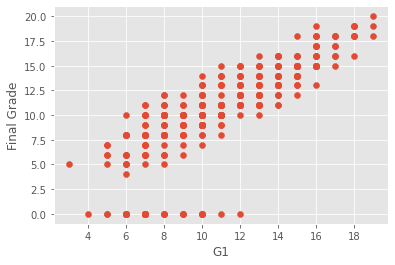

In [13]:
p = "G1"
style.use("ggplot")
pyplot.scatter(data[p],data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()